In [1]:
# Import libraries
from plantcv import plantcv as pcv 
from PIL import Image
import glob
from itertools import product
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.decomposition import PCA
from skimage.filters import threshold_li
from skimage import filters as filters


In [2]:
import os
class options:
    def __init__(self):
        self.image = "/home/grads/y/yashzambre/Desktop/YASH/plantpattern/landmark.png"
        self.debug = "plot"
        self.tmp_dir = "./home/grads/y/yashzambre/Desktop/YASH/plantpattern"
        self.result = os.path.join(self.tmp_dir, "try2.txt")
        self.writeimg= False 
        self.outdir = "./home/grads/y/yashzambre/Desktop/YASH/plantpattern"
        os.makedirs(self.tmp_dir, exist_ok=True)

# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug

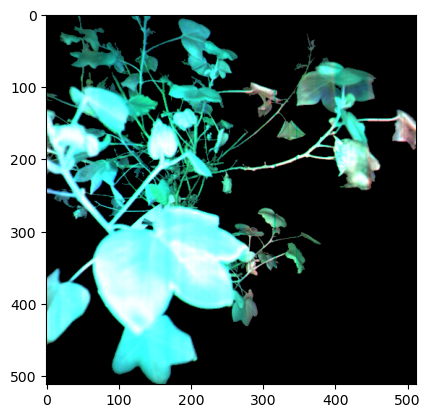

In [3]:
# Read image

# Inputs:
#   filename - Image file to be read in 
#   mode - How to read in the image; either 'native' (default), 'rgb', 'gray', or 'csv'
img, path, filename = pcv.readimage(filename=args.image)

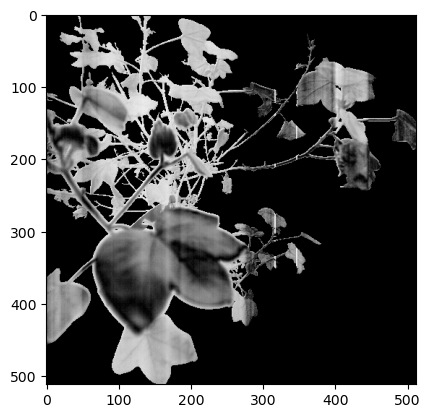

In [4]:
s = pcv.rgb2gray_hsv(rgb_img=img, channel='s')


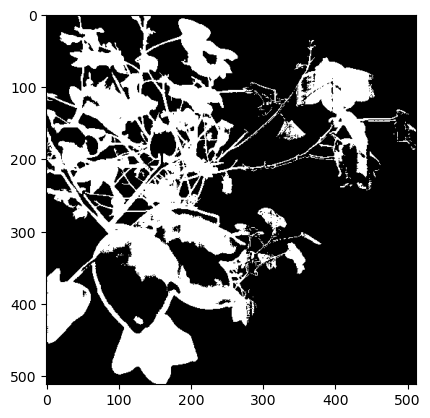

In [5]:
s_thresh = pcv.threshold.binary(gray_img=s, threshold=85, max_value=255, object_type='light')


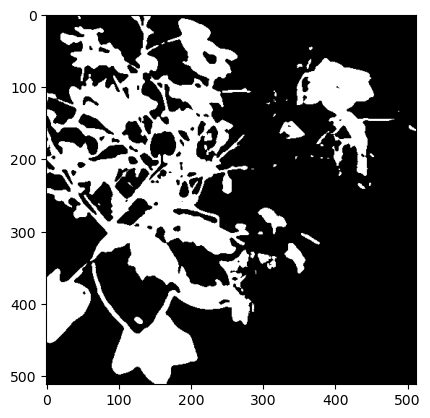

In [6]:
s_mblur = pcv.median_blur(gray_img=s_thresh, ksize=5)


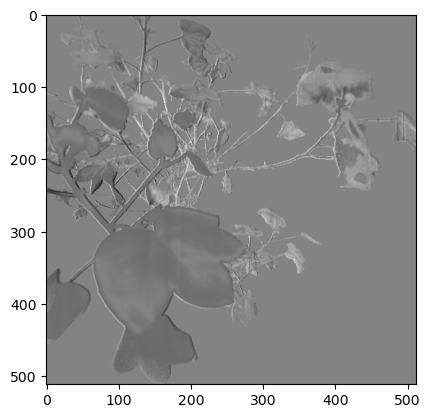

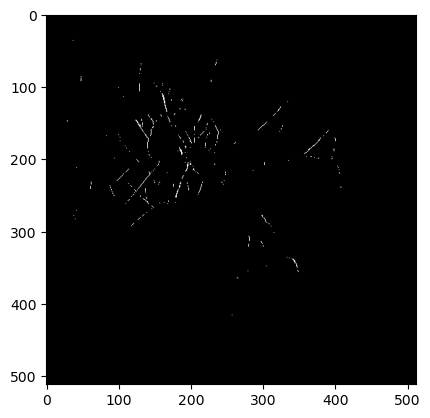

In [7]:
b = pcv.rgb2gray_lab(rgb_img=img, channel='b')
b_thresh = pcv.threshold.binary(gray_img=b, threshold=160, max_value=255,object_type='light')

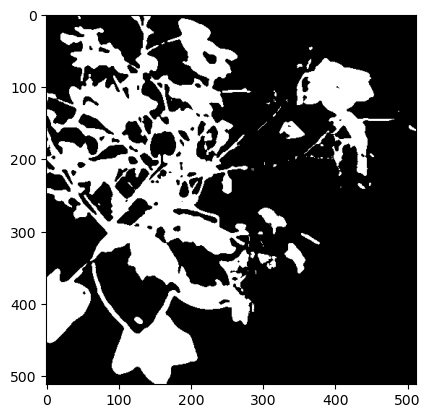

In [8]:
bs = pcv.logical_or(bin_img1=s_mblur, bin_img2=b_thresh)


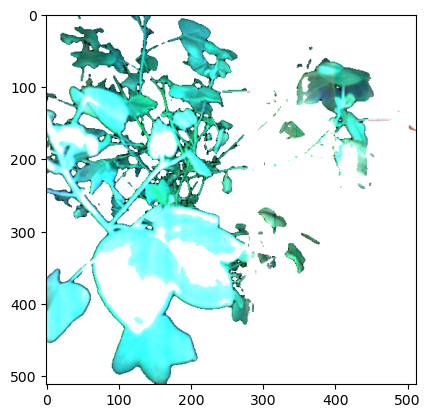

In [9]:
masked = pcv.apply_mask(img=img, mask=bs, mask_color='white')


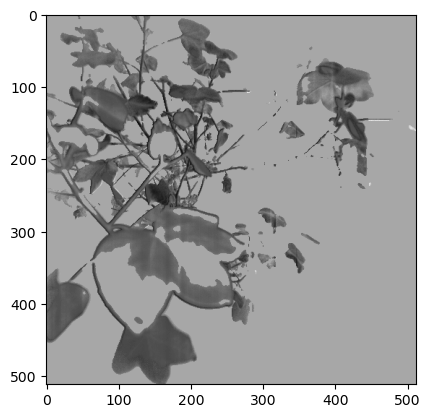

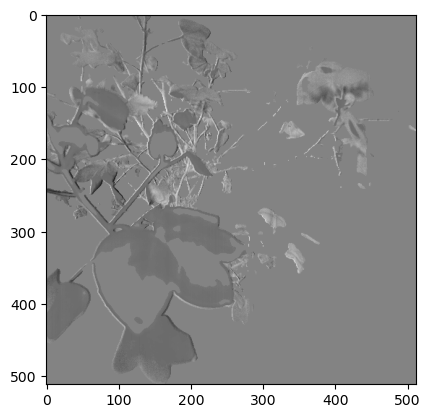

In [10]:
masked_a = pcv.rgb2gray_lab(rgb_img=masked, channel='a')
masked_b = pcv.rgb2gray_lab(rgb_img=masked, channel='b')

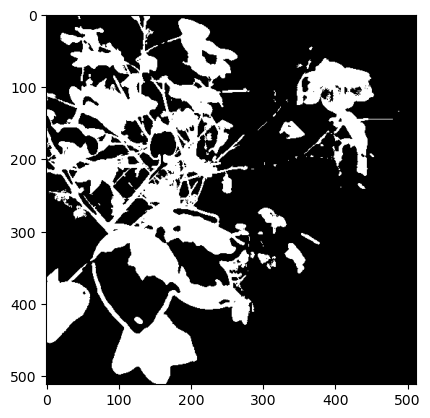

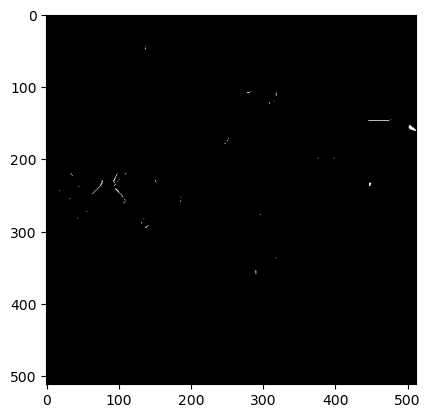

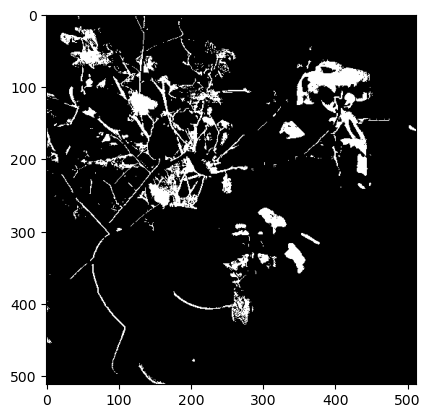

In [11]:
maskeda_thresh = pcv.threshold.binary(gray_img=masked_a, threshold=115, 
                                      max_value=255, object_type='dark')
maskeda_thresh1 = pcv.threshold.binary(gray_img=masked_a, threshold=135, 
                                       max_value=255, object_type='light')
maskedb_thresh = pcv.threshold.binary(gray_img=masked_b, threshold=128, 
                                      max_value=255, object_type='light')

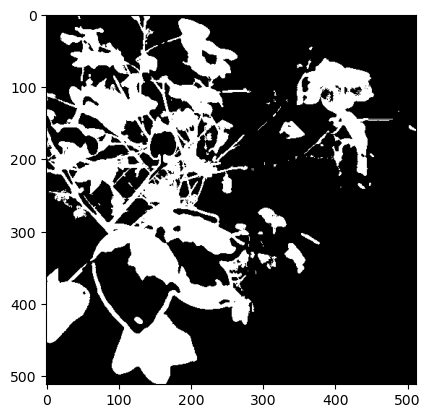

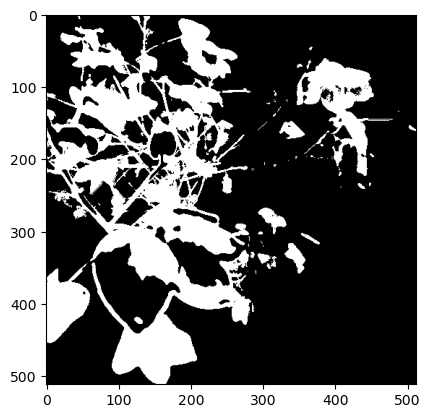

In [12]:
ab1 = pcv.logical_or(bin_img1=maskeda_thresh, bin_img2=maskedb_thresh)
ab = pcv.logical_or(bin_img1=maskeda_thresh1, bin_img2=ab1)

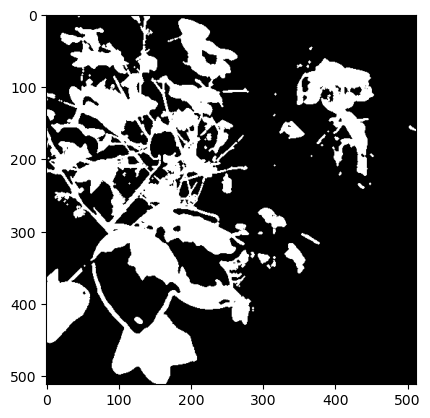

In [13]:
opened_ab = pcv.opening(gray_img=ab)

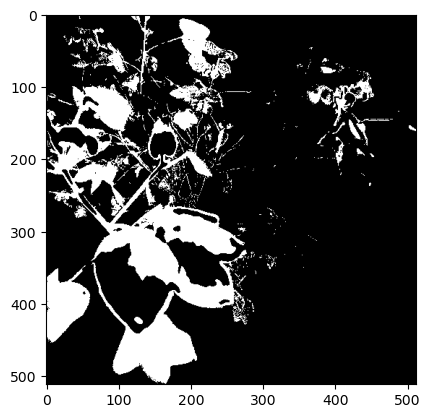

In [15]:
xor_img = pcv.logical_xor(bin_img1=maskeda_thresh, bin_img2=maskedb_thresh)


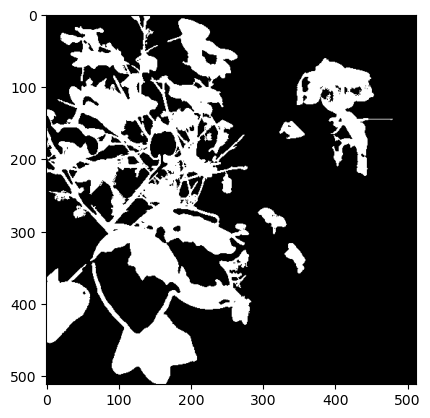

In [16]:
ab_fill = pcv.fill(bin_img=ab, size=200)


/home/grads/y/yashzambre/anaconda3/lib/python3.9/site-packages/plantcv/plantcv/closing.py:26: FutureWarning: `selem` is a deprecated argument name for `binary_closing`. It will be removed in version 1.0. Please use `footprint` instead.


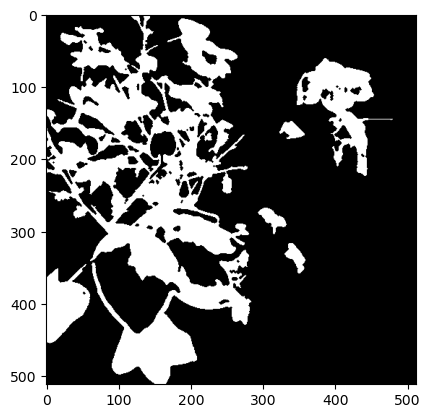

In [17]:
closed_ab = pcv.closing(gray_img=ab_fill)


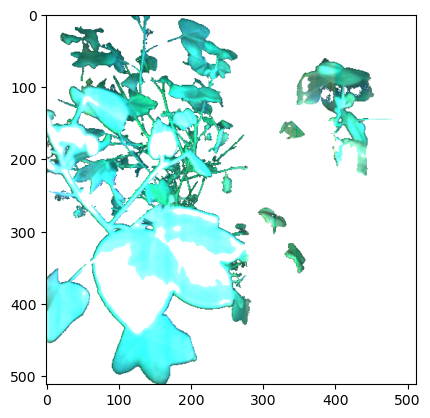

In [18]:
masked2 = pcv.apply_mask(img=masked, mask=ab_fill, mask_color='white')


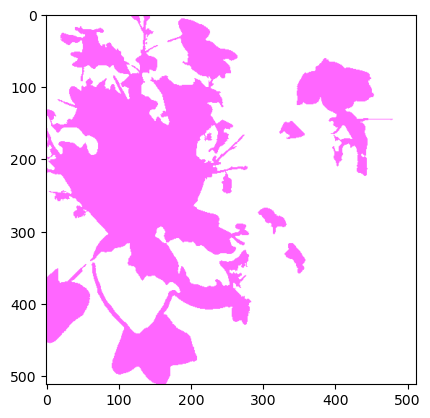

In [19]:
id_objects, obj_hierarchy = pcv.find_objects(img=masked2, mask=ab_fill)


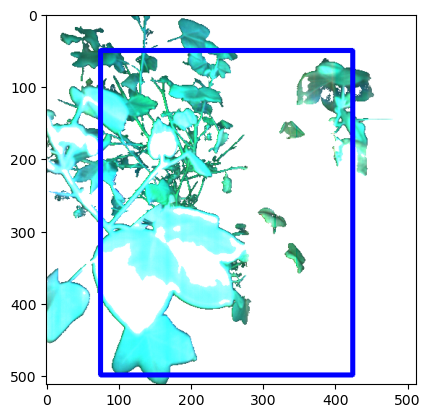

In [27]:
roi1, roi_hierarchy= pcv.roi.rectangle(img=masked2, x=75, y=50, h=450, w=350)


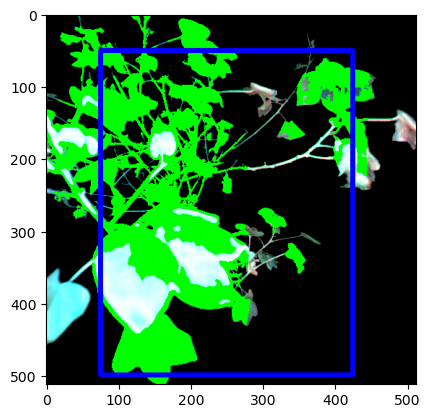

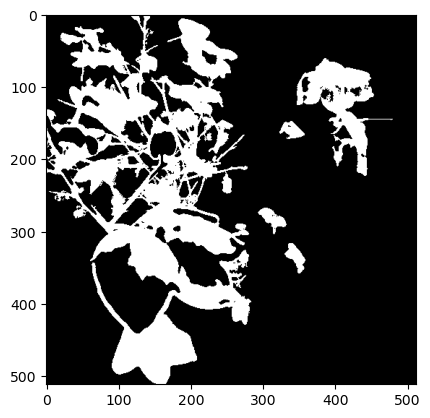

In [28]:
roi_objects, hierarchy3, kept_mask, obj_area = pcv.roi_objects(img=img, roi_contour=roi1, 
                                                               roi_hierarchy=roi_hierarchy, 
                                                               object_contour=id_objects, 
                                                               obj_hierarchy=obj_hierarchy,
                                                               roi_type='partial')

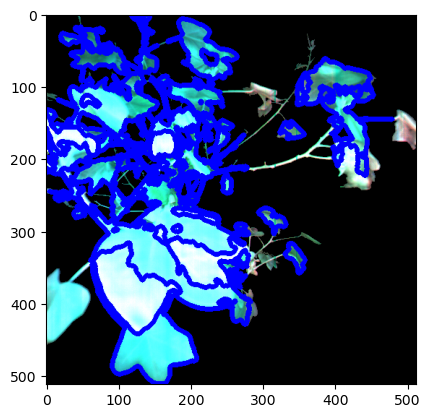

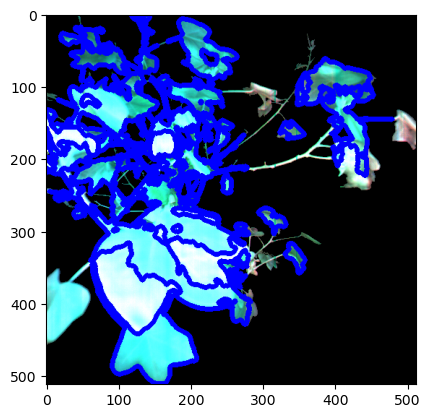

In [29]:
obj, mask = pcv.object_composition(img=img, contours=roi_objects, hierarchy=hierarchy3)


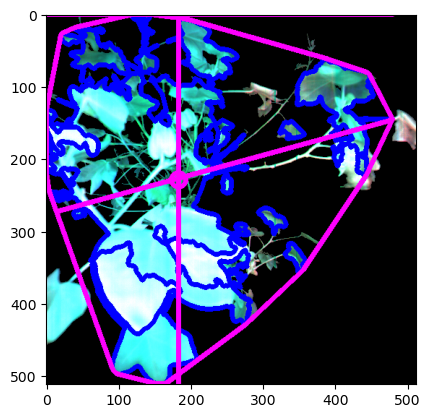

In [30]:
analysis_image = pcv.analyze_object(img=img, obj=obj, mask=mask, label="default")


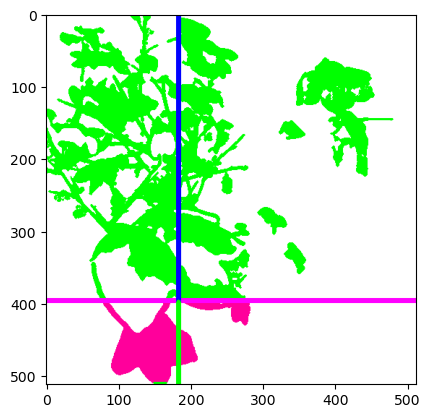

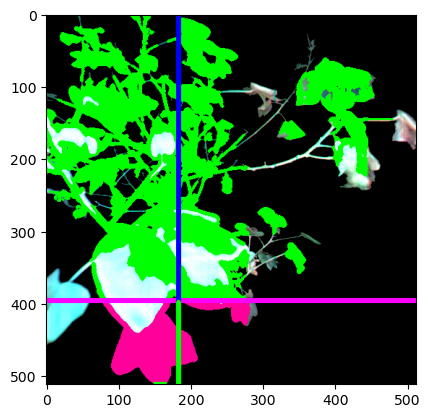

In [46]:
boundary_image2 = pcv.analyze_bound_horizontal(img=img, obj=obj, mask=mask, 
                                               line_position=400, label="default")


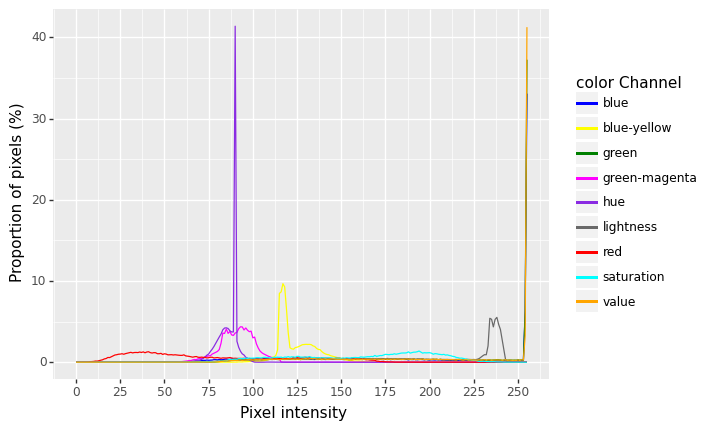

In [32]:
color_histogram = pcv.analyze_color(rgb_img=img, mask=kept_mask, colorspaces='all', label="default")


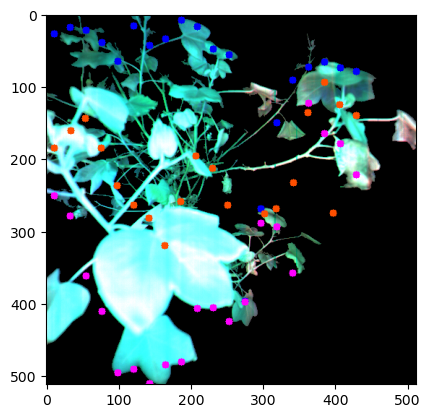

In [33]:
top_x, bottom_x, center_v_x = pcv.x_axis_pseudolandmarks(img=img, obj=obj, mask=mask, label="default")


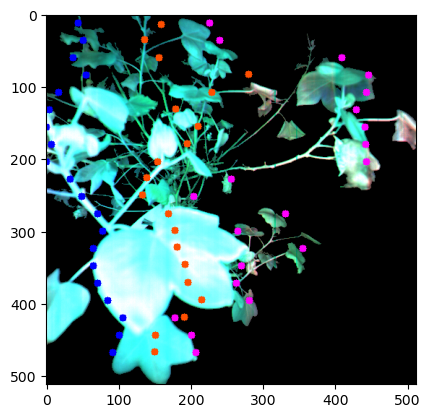

In [34]:
top_y, bottom_y, center_v_y = pcv.y_axis_pseudolandmarks(img=img, obj=obj, mask=mask)


landmark


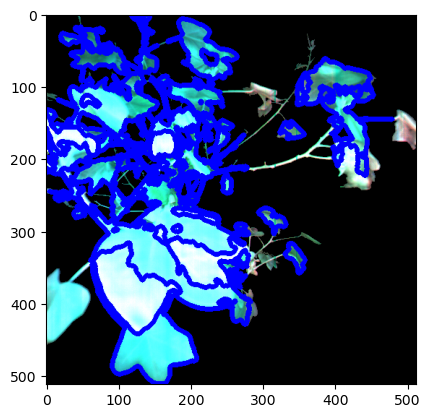

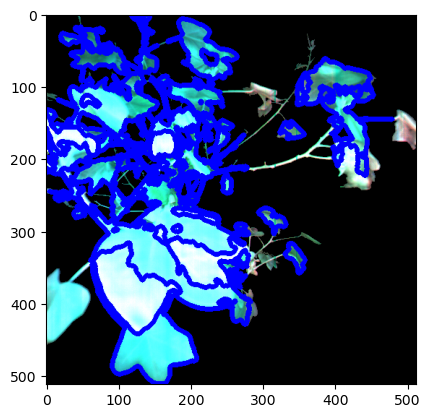

In [36]:
obj, mask = pcv.object_composition(img, roi_objects, hierarchy3)

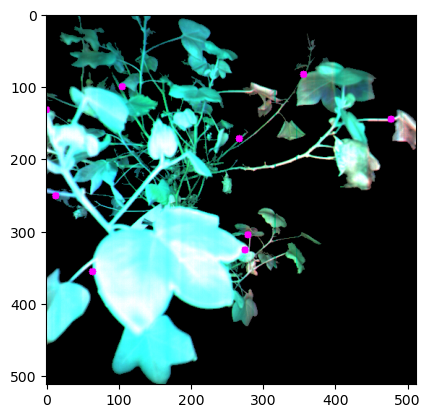

In [43]:
list_of_acute_points, points_img = pcv.acute_vertex(img=img, obj=obj,win=50, thresh=25, sep=200, label="default")

# Access data stored out from acute_vertex
vertices = pcv.outputs.observations['default']['tip_coordinates']['value']


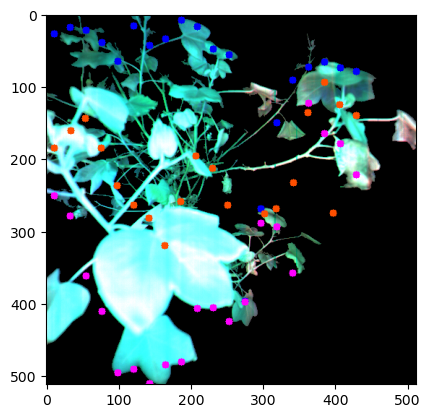

In [51]:
top, bottom, center_v = pcv.x_axis_pseudolandmarks(img=img, obj=obj, mask=mask, label="default")

# Access data stored out from x_axis_pseudolandmarks
bottom_landmarks = pcv.outputs.observations['default']['bottom_lmk']['value']



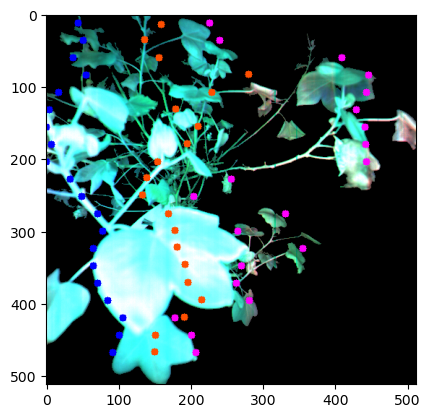

In [52]:
# Results in set of point values that may indicate tip points
left, right, center_h  = pcv.y_axis_pseudolandmarks(img=img, obj=obj, mask=mask, label="default")

# Access data stored out from y_axis_pseudolandmarks
left_landmarks = pcv.outputs.observations['default']['left_lmk']['value']

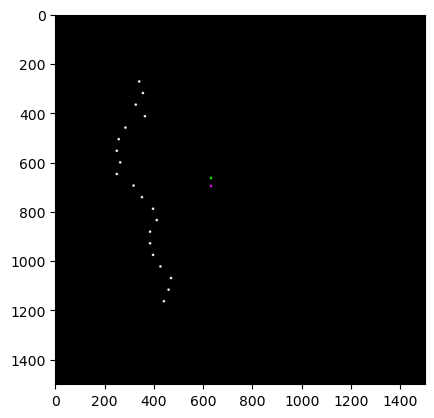

In [58]:
points_rescaled, centroid_rescaled, base_rescaled = pcv.scale_features(obj, mask, left, 
                                                                       line_position='300')


In [59]:
pcv.landmark_reference_pt_dist(points_r=points_rescaled, centroid_r=centroid_rescaled, bline_r=base_rescaled, label="default")

In [60]:
avg_vert_distance = pcv.outputs.observations['default']['vert_ave_c']['value']
